In [162]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [163]:
df = pd.read_csv('kolkata_flat_post_feature_selection.csv')

In [164]:
df.head()

,SOCIETY_NAME,location,BEDROOM_NUM,BALCONY_NUM,AREA,AGE,FURNISH,amenity_luxury,FLOOR_NUM,PRICE
0,222.0,232.0,2.0,1.0,920,2.0,3.0,2.0,1.0,0.39
1,499.0,149.0,1.0,1.0,535,2.0,3.0,2.0,1.0,0.27
2,417.0,334.0,4.0,2.0,1940,2.0,3.0,2.0,1.0,0.92
3,417.0,334.0,2.0,1.0,910,2.0,3.0,2.0,1.0,0.42
4,1306.0,283.0,3.0,1.0,1163,2.0,3.0,2.0,1.0,0.55


In [165]:
df.drop(columns='SOCIETY_NAME',inplace=True)

# Let we will try Linear model

In [166]:
x = df.drop(columns='PRICE')
y = df['PRICE']

In [167]:
x

,location,BEDROOM_NUM,BALCONY_NUM,AREA,AGE,FURNISH,amenity_luxury,FLOOR_NUM
0,232.0,2.0,1.0,920,2.0,3.0,2.0,1.0
1,149.0,1.0,1.0,535,2.0,3.0,2.0,1.0
2,334.0,4.0,2.0,1940,2.0,3.0,2.0,1.0
3,334.0,2.0,1.0,910,2.0,3.0,2.0,1.0
4,283.0,3.0,1.0,1163,2.0,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...
5143,63.0,2.0,1.0,730,3.0,0.0,2.0,1.0
5144,278.0,3.0,1.0,2000,0.0,1.0,1.0,1.0
5145,99.0,3.0,2.0,1843,1.0,1.0,1.0,0.0
5146,99.0,3.0,2.0,2079,1.0,1.0,1.0,2.0


In [168]:
x.head(5)

,location,BEDROOM_NUM,BALCONY_NUM,AREA,AGE,FURNISH,amenity_luxury,FLOOR_NUM
0,232.0,2.0,1.0,920,2.0,3.0,2.0,1.0
1,149.0,1.0,1.0,535,2.0,3.0,2.0,1.0
2,334.0,4.0,2.0,1940,2.0,3.0,2.0,1.0
3,334.0,2.0,1.0,910,2.0,3.0,2.0,1.0
4,283.0,3.0,1.0,1163,2.0,3.0,2.0,1.0


In [169]:
y

0       0.39
1       0.27
2       0.92
3       0.42
4       0.55
        ... 
5143    0.33
5144    1.80
5145    1.55
5146    1.75
5147    0.74
Name: PRICE, Length: 5148, dtype: float64

In [170]:
x.head(1)

,location,BEDROOM_NUM,BALCONY_NUM,AREA,AGE,FURNISH,amenity_luxury,FLOOR_NUM
0,232.0,2.0,1.0,920,2.0,3.0,2.0,1.0


In [171]:
columns_to_encode = ['location','AGE','FURNISH','amenity_luxury','FLOOR_NUM']
columns_to_scale = ['BEDROOM_NUM', 'BALCONY_NUM', 'AREA' ]

In [172]:
# Applying the log1p transformation to the target variable
y_transformed = np.log1p(y)

In [173]:
# Creating a column transformer for preprocessinanyg
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(),columns_to_scale),
        ('cat', OneHotEncoder(drop='first',handle_unknown='ignore'), columns_to_encode)
    ], 
    remainder='passthrough'
)

In [174]:
# Creating a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='rbf'))
])

In [175]:
# K-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, x, y_transformed, cv=kfold, scoring='r2')

In [176]:
scores.mean()

0.8845328666851859

In [177]:
scores.std()

0.014832158539672737

In [178]:
X_train, X_test, y_train, y_test = train_test_split(x,y_transformed,test_size=0.2,random_state=42)

In [179]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['BEDROOM_NUM', 'BALCONY_NUM',
                                                   'AREA']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['location', 'AGE', 'FURNISH',
                                                   'amenity_luxury',
                                                   'FLOOR_NUM'])])),
                ('regressor', SVR())])

In [180]:
y_pred = pipeline.predict(X_test)

In [181]:
y_pred = np.expm1(y_pred)

In [182]:
mean_absolute_error(np.expm1(y_test),y_pred)

0.19954079992420465

### SVR

In [183]:
import warnings
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_absolute_error

# Suppress specific warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='sklearn.preprocessing._encoders')

# Dropping the 'PRICE' column to separate features and target
x = df.drop(columns='PRICE')
y = df['PRICE']

# Columns to encode and scale
columns_to_encode = ['location', 'AGE', 'FURNISH', 'amenity_luxury', 'FLOOR_NUM']
columns_to_scale = ['BEDROOM_NUM', 'BALCONY_NUM', 'AREA']

# Applying the log1p transformation to the target variable
y_transformed = np.log1p(y)

# Creating a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columns_to_scale),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), columns_to_encode)
    ], 
    remainder='passthrough'
)

# Creating a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='rbf'))
])

# K-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, x, y_transformed, cv=kfold, scoring='r2')

# Print the cross-validation results
print(f"Mean R2 score: {scores.mean():.4f}")
print(f"Standard Deviation of R2 scores: {scores.std():.4f}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y_transformed, test_size=0.2, random_state=42)

# Fitting the pipeline
pipeline.fit(X_train, y_train)

# Making predictions
y_pred = pipeline.predict(X_test)

# Reverting the log1p transformation
y_pred = np.expm1(y_pred)

# Evaluating the model
mae = mean_absolute_error(np.expm1(y_test), y_pred)
print(f"Mean Absolute Error: {mae:.4f}")


Mean R2 score: 0.8845
Standard Deviation of R2 scores: 0.0148
Mean Absolute Error: 0.1995


### Linear Regression

In [184]:
import warnings
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_absolute_error

# Suppress specific warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='sklearn.preprocessing._encoders')

# Dropping the 'PRICE' column to separate features and target
x = df.drop(columns='PRICE')
y = df['PRICE']

# Columns to encode and scale
columns_to_encode = ['location', 'AGE', 'FURNISH', 'amenity_luxury', 'FLOOR_NUM']
columns_to_scale = ['BEDROOM_NUM', 'BALCONY_NUM', 'AREA']

# Applying the log1p transformation to the target variable
y_transformed = np.log1p(y)

# Creating a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columns_to_scale),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), columns_to_encode)
    ], 
    remainder='passthrough'
)

# Creating a pipeline with Linear Regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# K-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, x, y_transformed, cv=kfold, scoring='r2')

# Print the cross-validation results
print(f"Mean R2 score: {scores.mean():.4f}")
print(f"Standard Deviation of R2 scores: {scores.std():.4f}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y_transformed, test_size=0.2, random_state=42)

# Fitting the pipeline
pipeline.fit(X_train, y_train)

# Making predictions
y_pred = pipeline.predict(X_test)

# Reverting the log1p transformation
y_pred = np.expm1(y_pred)

# Evaluating the model
mae = mean_absolute_error(np.expm1(y_test), y_pred)
print(f"Mean Absolute Error: {mae:.4f}")


Mean R2 score: 0.8730
Standard Deviation of R2 scores: 0.0135
Mean Absolute Error: 0.2077


### Gradient Boosting

In [185]:
import warnings
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_absolute_error

# Suppress specific warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='sklearn.preprocessing._encoders')

# Dropping the 'PRICE' column to separate features and target
x = df.drop(columns='PRICE')
y = df['PRICE']

# Columns to encode and scale
columns_to_encode = ['location', 'AGE', 'FURNISH', 'amenity_luxury', 'FLOOR_NUM']
columns_to_scale = ['BEDROOM_NUM', 'BALCONY_NUM', 'AREA']

# Applying the log1p transformation to the target variable
y_transformed = np.log1p(y)

# Creating a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columns_to_scale),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), columns_to_encode)
    ], 
    remainder='passthrough'
)

# Creating a pipeline with Gradient Boosting Regressor
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# K-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, x, y_transformed, cv=kfold, scoring='r2')

# Print the cross-validation results
print(f"Mean R2 score: {scores.mean():.4f}")
print(f"Standard Deviation of R2 scores: {scores.std():.4f}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y_transformed, test_size=0.2, random_state=42)

# Fitting the pipeline
pipeline.fit(X_train, y_train)

# Making predictions
y_pred = pipeline.predict(X_test)

# Reverting the log1p transformation
y_pred = np.expm1(y_pred)

# Evaluating the model
mae = mean_absolute_error(np.expm1(y_test), y_pred)
print(f"Mean Absolute Error: {mae:.4f}")


Mean R2 score: 0.8589
Standard Deviation of R2 scores: 0.0203
Mean Absolute Error: 0.2177


In [186]:
import warnings
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_absolute_error

# Suppress specific warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='sklearn.preprocessing._encoders')

# Dropping the 'PRICE' column to separate features and target
x = df.drop(columns='PRICE')
y = df['PRICE']

# Columns to encode and scale
columns_to_encode = ['location', 'AGE', 'FURNISH', 'amenity_luxury', 'FLOOR_NUM']
columns_to_scale = ['BEDROOM_NUM', 'BALCONY_NUM', 'AREA']

# Applying the log1p transformation to the target variable
y_transformed = np.log1p(y)

# Creating a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columns_to_scale),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), columns_to_encode)
    ], 
    remainder='passthrough'
)

# Creating a pipeline with XGBoost Regressor
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42))
])

# K-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, x, y_transformed, cv=kfold, scoring='r2')

# Print the cross-validation results
print(f"Mean R2 score: {scores.mean():.4f}")
print(f"Standard Deviation of R2 scores: {scores.std():.4f}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y_transformed, test_size=0.2, random_state=42)

# Fitting the pipeline
pipeline.fit(X_train, y_train)

# Making predictions
y_pred = pipeline.predict(X_test)

# Reverting the log1p transformation
y_pred = np.expm1(y_pred)

# Evaluating the model
mae = mean_absolute_error(np.expm1(y_test), y_pred)
print(f"Mean Absolute Error: {mae:.4f}")


Mean R2 score: 0.8944
Standard Deviation of R2 scores: 0.0152
Mean Absolute Error: 0.1830


In [187]:
import warnings
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_absolute_error

# Suppress specific warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

# Dropping the 'PRICE' column to separate features and target
x = df.drop(columns='PRICE')
y = df['PRICE']

# Columns to encode and scale
columns_to_encode = ['location', 'AGE', 'FURNISH', 'amenity_luxury', 'FLOOR_NUM']
columns_to_scale = ['BEDROOM_NUM', 'BALCONY_NUM', 'AREA']

# Applying the log1p transformation to the target variable
y_transformed = np.log1p(y)

# Label encoding the categorical columns
for col in columns_to_encode:
    label_encoder = LabelEncoder()
    x[col] = label_encoder.fit_transform(x[col])

# Creating a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columns_to_scale)
    ], 
    remainder='passthrough'
)

# Creating a pipeline with XGBoost Regressor
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42))
])

# K-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, x, y_transformed, cv=kfold, scoring='r2')

# Print the cross-validation results
print(f"Mean R2 score: {scores.mean():.4f}")
print(f"Standard Deviation of R2 scores: {scores.std():.4f}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y_transformed, test_size=0.2, random_state=42)

# Fitting the pipeline
pipeline.fit(X_train, y_train)

# Making predictions
y_pred = pipeline.predict(X_test)

# Reverting the log1p transformation
y_pred = np.expm1(y_pred)

# Evaluating the model
mae = mean_absolute_error(np.expm1(y_test), y_pred)
print(f"Mean Absolute Error: {mae:.4f}")


Mean R2 score: 0.8786
Standard Deviation of R2 scores: 0.0171
Mean Absolute Error: 0.1865


# With One hot encoding

In [188]:
import warnings
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor

# Suppress specific warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

# Dropping the 'PRICE' column to separate features and target
x = df.drop(columns='PRICE')
y = df['PRICE']

# Columns to encode and scale
columns_to_encode = ['location', 'AGE', 'FURNISH', 'amenity_luxury', 'FLOOR_NUM']
columns_to_scale = ['BEDROOM_NUM', 'BALCONY_NUM', 'AREA']

# Applying the log1p transformation to the target variable
y_transformed = np.log1p(y)

# Create preprocessing transformers for all models (one-hot encoding for all)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columns_to_scale),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), columns_to_encode)
    ],
    remainder='passthrough'
)

# List of models to evaluate
models = [
    ('Linear Regression', LinearRegression()),
    ('SVR', SVR(kernel='rbf')),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('AdaBoost', AdaBoostRegressor(random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('Deep Learning', MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=100, random_state=42))
]

# K-fold cross-validation setup
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate all models
for name, model in models:
    print(f"{name} with One-Hot Encoding:")
    
    # Creating a pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # Cross-validation
    scores = cross_val_score(pipeline, x, y_transformed, cv=kfold, scoring='r2')
    print(f"Mean R2 score: {scores.mean():.4f}")
    print(f"Std of R2 scores: {scores.std():.4f}")
    
    # Train-test split for final evaluation
    X_train, X_test, y_train, y_test = train_test_split(x, y_transformed, test_size=0.2, random_state=42)
    
    # Fitting the pipeline
    pipeline.fit(X_train, y_train)
    
    # Making predictions
    y_pred = pipeline.predict(X_test)
    
    # Reverting the log1p transformation
    y_pred = np.expm1(y_pred)
    y_test = np.expm1(y_test)
    
    # Evaluating the model
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Absolute Error: {mae:.4f}\n")
    print("-" * 40)


Linear Regression with One-Hot Encoding:
Mean R2 score: 0.8730
Std of R2 scores: 0.0135
Mean Absolute Error: 0.2077

----------------------------------------
SVR with One-Hot Encoding:
Mean R2 score: 0.8845
Std of R2 scores: 0.0148
Mean Absolute Error: 0.1995

----------------------------------------
Decision Tree with One-Hot Encoding:
Mean R2 score: 0.8152
Std of R2 scores: 0.0302
Mean Absolute Error: 0.2271

----------------------------------------
Random Forest with One-Hot Encoding:
Mean R2 score: 0.8814
Std of R2 scores: 0.0175
Mean Absolute Error: 0.1887

----------------------------------------
Gradient Boosting with One-Hot Encoding:
Mean R2 score: 0.8589
Std of R2 scores: 0.0203
Mean Absolute Error: 0.2177

----------------------------------------
AdaBoost with One-Hot Encoding:
Mean R2 score: 0.7449
Std of R2 scores: 0.0379
Mean Absolute Error: 0.3002

----------------------------------------
XGBoost with One-Hot Encoding:
Mean R2 score: 0.8944
Std of R2 scores: 0.0152
Mean 

# Linear Model with One hot encoding but Tree model without one hot encoding

In [189]:
import warnings
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_absolute_error

# Suppress specific warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

# Dropping the 'PRICE' column to separate features and target
x = df.drop(columns='PRICE')
y = df['PRICE']

# Columns to encode and scale
columns_to_encode = ['location', 'AGE', 'FURNISH', 'amenity_luxury', 'FLOOR_NUM']
columns_to_scale = ['BEDROOM_NUM', 'BALCONY_NUM', 'AREA']

# Applying the log1p transformation to the target variable
y_transformed = np.log1p(y)

# Create preprocessing transformers for linear models
preprocessor_linear = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columns_to_scale),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), columns_to_encode)
    ], 
    remainder='passthrough'
)

# Create preprocessing transformers for tree-based models (no one-hot encoding)
preprocessor_tree = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columns_to_scale)
    ], 
    remainder='passthrough'
)

# List of models to evaluate
models_linear = [
    ('Linear Regression', LinearRegression()),
    ('SVR', SVR(kernel='rbf'))
]

models_tree = [
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('AdaBoost', AdaBoostRegressor(random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42))
]

# K-fold cross-validation setup
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate linear models with one-hot encoding
for name, model in models_linear:
    print(f"{name} with One-Hot Encoding:")
    
    # Creating a pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor_linear),
        ('regressor', model)
    ])
    
    # Cross-validation
    scores = cross_val_score(pipeline, x, y_transformed, cv=kfold, scoring='r2')
    print(f"Mean R2 score: {scores.mean():.4f}")
    print(f"Std of R2 scores: {scores.std():.4f}")
    
    # Separate train-test split for final evaluation
    X_train, X_test, y_train, y_test = train_test_split(x, y_transformed, test_size=0.2, random_state=42)
    
    # Fitting the pipeline
    pipeline.fit(X_train, y_train)
    
    # Making predictions
    y_pred = pipeline.predict(X_test)
    
    # Reverting the log1p transformation
    y_pred = np.expm1(y_pred)
    
    # Evaluating the model
    mae = mean_absolute_error(np.expm1(y_test), y_pred)
    print(f"Mean Absolute Error: {mae:.4f}\n")
    print("-" * 40)

# Evaluate tree-based models without one-hot encoding
for name, model in models_tree:
    print(f"{name} without One-Hot Encoding:")
    
    # Creating a pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor_tree),
        ('regressor', model)
    ])
    
    # Cross-validation
    scores = cross_val_score(pipeline, x, y_transformed, cv=kfold, scoring='r2')
    print(f"Mean R2 score: {scores.mean():.4f}")
    print(f"Std of R2 scores: {scores.std():.4f}")
    
    # Separate train-test split for final evaluation
    X_train, X_test, y_train, y_test = train_test_split(x, y_transformed, test_size=0.05, random_state=42)
    
    # Fitting the pipeline
    pipeline.fit(X_train, y_train)
    
    # Making predictions
    y_pred = pipeline.predict(X_test)
    
    # Reverting the log1p transformation
    y_pred = np.expm1(y_pred)
    
    # Evaluating the model
    mae = mean_absolute_error(np.expm1(y_test), y_pred)
    print(f"Mean Absolute Error: {mae:.4f}\n")
    print("-" * 40)


Linear Regression with One-Hot Encoding:
Mean R2 score: 0.8730
Std of R2 scores: 0.0135
Mean Absolute Error: 0.2077

----------------------------------------
SVR with One-Hot Encoding:
Mean R2 score: 0.8845
Std of R2 scores: 0.0148
Mean Absolute Error: 0.1995

----------------------------------------
Decision Tree without One-Hot Encoding:
Mean R2 score: 0.7439
Std of R2 scores: 0.0346
Mean Absolute Error: 0.2859

----------------------------------------
Random Forest without One-Hot Encoding:
Mean R2 score: 0.8677
Std of R2 scores: 0.0210
Mean Absolute Error: 0.2404

----------------------------------------
Gradient Boosting without One-Hot Encoding:
Mean R2 score: 0.8534
Std of R2 scores: 0.0228
Mean Absolute Error: 0.2537

----------------------------------------
AdaBoost without One-Hot Encoding:
Mean R2 score: 0.7212
Std of R2 scores: 0.0417
Mean Absolute Error: 0.3690

----------------------------------------
XGBoost without One-Hot Encoding:
Mean R2 score: 0.8786
Std of R2 score

In [190]:
df

,location,BEDROOM_NUM,BALCONY_NUM,AREA,AGE,FURNISH,amenity_luxury,FLOOR_NUM,PRICE
0,232.0,2.0,1.0,920,2.0,3.0,2.0,1.0,0.39
1,149.0,1.0,1.0,535,2.0,3.0,2.0,1.0,0.27
2,334.0,4.0,2.0,1940,2.0,3.0,2.0,1.0,0.92
3,334.0,2.0,1.0,910,2.0,3.0,2.0,1.0,0.42
4,283.0,3.0,1.0,1163,2.0,3.0,2.0,1.0,0.55
...,...,...,...,...,...,...,...,...,...
5143,63.0,2.0,1.0,730,3.0,0.0,2.0,1.0,0.33
5144,278.0,3.0,1.0,2000,0.0,1.0,1.0,1.0,1.80
5145,99.0,3.0,2.0,1843,1.0,1.0,1.0,0.0,1.55
5146,99.0,3.0,2.0,2079,1.0,1.0,1.0,2.0,1.75


In [195]:
import warnings
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_absolute_error

# Suppress specific warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

# Dropping the 'PRICE' column to separate features and target
x = df.drop(columns=['PRICE','amenity_luxury'])
y = df['PRICE']

# Columns to encode and scale
columns_to_encode = ['location', 'FLOOR_NUM','FURNISH', 'AGE']
columns_to_scale = ['BEDROOM_NUM', 'BALCONY_NUM', 'AREA']

# Applying the log1p transformation to the target variable
y_transformed = np.log1p(y)

# Create preprocessing transformers for linear models
preprocessor_linear = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columns_to_scale),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), columns_to_encode)
    ], 
    remainder='passthrough'
)

# Create preprocessing transformers for tree-based models (no one-hot encoding)
preprocessor_tree = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columns_to_scale)
    ], 
    remainder='passthrough'
)

# List of models to evaluate
models_linear = [
    ('Linear Regression', LinearRegression()),
    ('SVR', SVR(kernel='rbf'))
]

models_tree = [
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('AdaBoost', AdaBoostRegressor(random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42))
]

# K-fold cross-validation setup
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate linear models with one-hot encoding
for name, model in models_linear:
    print(f"{name} with One-Hot Encoding:")
    
    # Creating a pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor_linear),
        ('regressor', model)
    ])
    
    # Cross-validation
    scores = cross_val_score(pipeline, x, y_transformed, cv=kfold, scoring='r2')
    print(f"Mean R2 score: {scores.mean():.4f}")
    print(f"Std of R2 scores: {scores.std():.4f}")
    
    # Separate train-test split for final evaluation
    X_train, X_test, y_train, y_test = train_test_split(x, y_transformed, test_size=0.2, random_state=42)
    
    # Fitting the pipeline
    pipeline.fit(X_train, y_train)
    
    # Making predictions
    y_pred = pipeline.predict(X_test)
    
    # Reverting the log1p transformation
    y_pred = np.expm1(y_pred)
    
    # Evaluating the model
    mae = mean_absolute_error(np.expm1(y_test), y_pred)
    print(f"Mean Absolute Error: {mae:.4f}\n")
    print("-" * 40)

# Evaluate tree-based models without one-hot encoding
for name, model in models_tree:
    print(f"{name} without One-Hot Encoding:")
    
    # Creating a pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor_tree),
        ('regressor', model)
    ])
    
    # Cross-validation
    scores = cross_val_score(pipeline, x, y_transformed, cv=kfold, scoring='r2')
    print(f"Mean R2 score: {scores.mean():.4f}")
    print(f"Std of R2 scores: {scores.std():.4f}")
    
    # Separate train-test split for final evaluation
    X_train, X_test, y_train, y_test = train_test_split(x, y_transformed, test_size=0.05, random_state=42)
    
    # Fitting the pipeline
    pipeline.fit(X_train, y_train)
    
    # Making predictions
    y_pred = pipeline.predict(X_test)
    
    # Reverting the log1p transformation
    y_pred = np.expm1(y_pred)
    
    # Evaluating the model
    mae = mean_absolute_error(np.expm1(y_test), y_pred)
    print(f"Mean Absolute Error: {mae:.4f}\n")
    print("-" * 40)


Linear Regression with One-Hot Encoding:
Mean R2 score: 0.8735
Std of R2 scores: 0.0136
Mean Absolute Error: 0.2079

----------------------------------------
SVR with One-Hot Encoding:
Mean R2 score: 0.8852
Std of R2 scores: 0.0152
Mean Absolute Error: 0.1939

----------------------------------------
Decision Tree without One-Hot Encoding:
Mean R2 score: 0.7486
Std of R2 scores: 0.0367
Mean Absolute Error: 0.3150

----------------------------------------
Random Forest without One-Hot Encoding:
Mean R2 score: 0.8689
Std of R2 scores: 0.0211
Mean Absolute Error: 0.2425

----------------------------------------
Gradient Boosting without One-Hot Encoding:
Mean R2 score: 0.8534
Std of R2 scores: 0.0218
Mean Absolute Error: 0.2574

----------------------------------------
AdaBoost without One-Hot Encoding:
Mean R2 score: 0.7277
Std of R2 scores: 0.0397
Mean Absolute Error: 0.3620

----------------------------------------
XGBoost without One-Hot Encoding:
Mean R2 score: 0.8791
Std of R2 score

<Axes: xlabel='PRICE', ylabel='Count'>

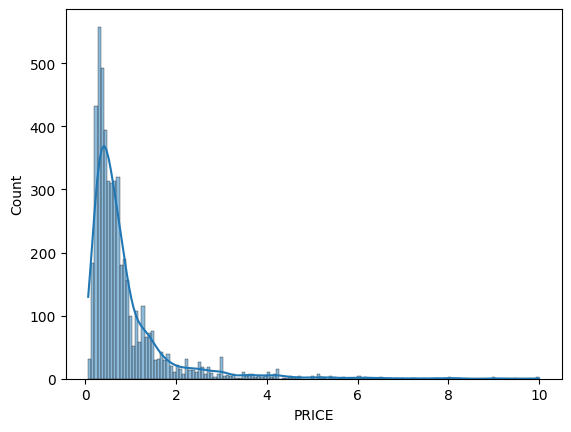

In [192]:
sns.histplot(df,x = 'PRICE',kde=True)

In [193]:
skewness = df['PRICE'].skew()
kurtosis = df['PRICE'].kurt()
std = df['PRICE'].std()
skewness, kurtosis,std

(3.7240072831985076, 19.404608839881302, 0.9609271173690063)

0.003381986400972896 -0.545134017627571 0.04132882404546577


<Axes: xlabel='PRICE', ylabel='Count'>

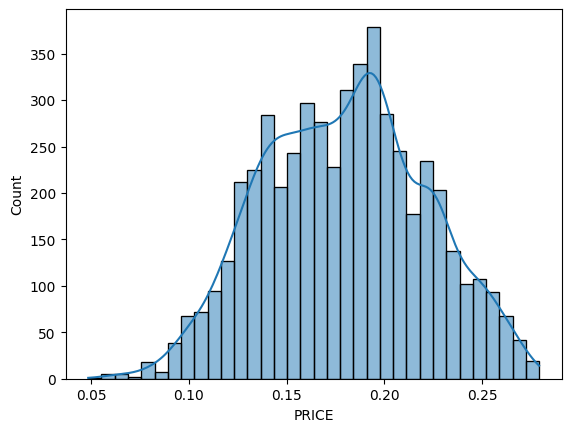

In [194]:
test = np.log1p(np.log1p(np.log1p(np.log1p(np.log1p(np.log1p(np.log1p(np.log1p(df['PRICE']))))))))
skewness = test.skew()
kurtosis = test.kurt()
std = test.std()
print(skewness, kurtosis,std)
sns.histplot(test,kde=True)